In [21]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [22]:
def merge_files(input_files, output_file):
    with open(output_file, 'w', encoding='utf-8') as out_file:
        for file_path in input_files:
            with open(file_path, 'r', encoding='utf-8') as in_file:
                content = in_file.read()
                out_file.write(content + '\n')

input_files = [
    "/content/oss_wikipedia_2010_10K-sentences.txt",
    "/content/oss_wikipedia_2016_10K-sentences.txt",
    "/content/oss_wikipedia_2014_10K-sentences.txt",
    "/content/oss_wikipedia_2010_10K-sentences.txt"
]
merged_sentences_file = "/content/merged_sentences.txt"

merge_files(input_files, merged_sentences_file)
print(f"Файлы   в: {merged_sentences_file}")

Файлы   в: /content/merged_sentences.txt


In [23]:
def print_first_lines(file_path, num_lines=5):
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if i < num_lines:
                print(line.strip())

print(f"Первые 5 предложений файла: {merged_sentences_file}:")
print_first_lines(merged_sentences_file)

Первые 5 предложений файла: /content/merged_sentences.txt:
1	1206-æм азы Темуджин сси æппæт монгойлаг знæмты хан, æмæ йын радтой титул Чингисхан.
2	1206-æм азы Хъарс бацæхстой гуырдзы æмæ йæ Закариды (Закарид-Мхаргрзелийы) мыггагæн радтой. 1230-æм азты кæронмæ сахар ногæй сси туркаг эмирты дæлбар.
3	1207-æм азы Сослан-Дауыт амарди æмæ Тамар барадмæ æркодта сæ фырт Гиуæрги-Лашæйы.
4	1321 ), италиаг поэт.
5	1376 -æм азы сахар æрцыдис пырх Зæрин Ордайы лæбурдæй, фæлæ рæхджы уыцы бынаты сывзæрд ног сахар.


In [24]:
def remove_first_word_from_file(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as fin, open(output_file, 'w', encoding='utf-8') as fout:
        for line in fin:
            words = line.split()
            if len(words) > 1:
                fout.write(' '.join(words[1:]) + '\n')

modified_sentences = "/content/modified_sentences.txt"

remove_first_word_from_file(merged_sentences_file, modified_sentences)
print(f"Файл {merged_sentences_file} был обработан. Результат сохранен в {modified_sentences}.")

Файл /content/merged_sentences.txt был обработан. Результат сохранен в /content/modified_sentences.txt.


In [25]:
print_first_lines(modified_sentences)

1206-æм азы Темуджин сси æппæт монгойлаг знæмты хан, æмæ йын радтой титул Чингисхан.
1206-æм азы Хъарс бацæхстой гуырдзы æмæ йæ Закариды (Закарид-Мхаргрзелийы) мыггагæн радтой. 1230-æм азты кæронмæ сахар ногæй сси туркаг эмирты дæлбар.
1207-æм азы Сослан-Дауыт амарди æмæ Тамар барадмæ æркодта сæ фырт Гиуæрги-Лашæйы.
1321 ), италиаг поэт.
1376 -æм азы сахар æрцыдис пырх Зæрин Ордайы лæбурдæй, фæлæ рæхджы уыцы бынаты сывзæрд ног сахар.


In [26]:
def count_lines_in_file(output_file):
    count = 0
    with open(modified_sentences, 'r', encoding='utf-8') as file:
        for line in file:
            count += 1
    return count

line_count = count_lines_in_file(modified_sentences)
print(f"Количество строк в файле '{modified_sentences}': {line_count}")

Количество строк в файле '/content/modified_sentences.txt': 40000


In [27]:
def tokenize_and_count_words(file_path):
    word_counts = Counter()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            cleaned_line = re.sub(r'[^\w\s]', '', line.lower().strip())
            words = cleaned_line.split()
            word_counts.update(words)
    return word_counts

def sort_words_by_frequency(word_counts):
    sorted_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_words

In [28]:
word_counts = tokenize_and_count_words(modified_sentences)
sorted_words = sort_words_by_frequency(word_counts)

In [29]:
print("Топ 100 самых встречаемых слов:")
for index, (word, count) in enumerate(sorted_words[:100], start=1):
    print(f"{index}. {word}: {count}")

Топ 100 самых встречаемых слов:
1. æмæ: 13596
2. у: 10361
3. йæ: 7765
4. азы: 6308
5. уый: 3776
6. уыцы: 3407
7. ис: 3161
8. дæр: 3107
9. сты: 2712
10. сахар: 2561
11. сæ: 2509
12. иу: 2296
13. кодта: 2250
14. нæ: 2105
15. дзы: 2048
16. ирон: 1965
17. та: 1861
18. чи: 1836
19. фæлæ: 1702
20. ахæм: 1653
21. фыццаг: 1624
22. тыххæй: 1545
23. ацы: 1542
24. гæсгæ: 1525
25. уыд: 1508
26. куы: 1489
27. адæймаджы: 1475
28. уыди: 1463
29. ирыстоны: 1428
30. уыдис: 1422
31. ма: 1392
32. уæд: 1361
33. кæй: 1324
34. ном: 1293
35. цы: 1280
36. сæйраг: 1276
37. кодтой: 1223
38. бирæ: 1195
39. фæстæ: 1176
40. хуссар: 1163
41. фылдæр: 1155
42. цæрынц: 1127
43. мин: 1078
44. цæгат: 1041
45. бон: 1029
46. куыд: 1006
47. стыр: 990
48. сси: 955
49. кæнæ: 903
50. хсæн: 899
51. дыууæ: 862
52. азты: 832
53. хай: 825
54. æндæр: 821
55. æм: 811
56. уæрæсейы: 811
57. сахары: 798
58. æвзаг: 796
59. цаутæ: 781
60. уыдысты: 759
61. кæны: 758
62. уыдон: 744
63. кæнынц: 727
64. мыггаг: 723
65. стырдæр: 717
66. ног:

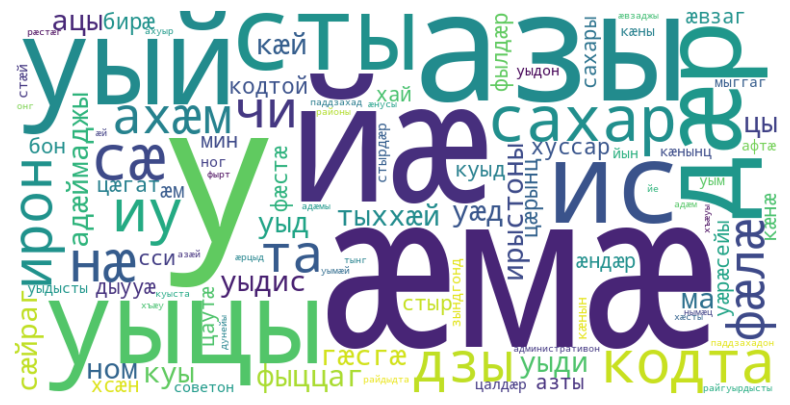

In [30]:
def create_wordcloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(dict(sorted_words[:100]))

<ipython-input-31-77381e713538>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=list(words), y=list(counts), palette="viridis")
<ipython-input-31-77381e713538>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha="right", fontsize=12)


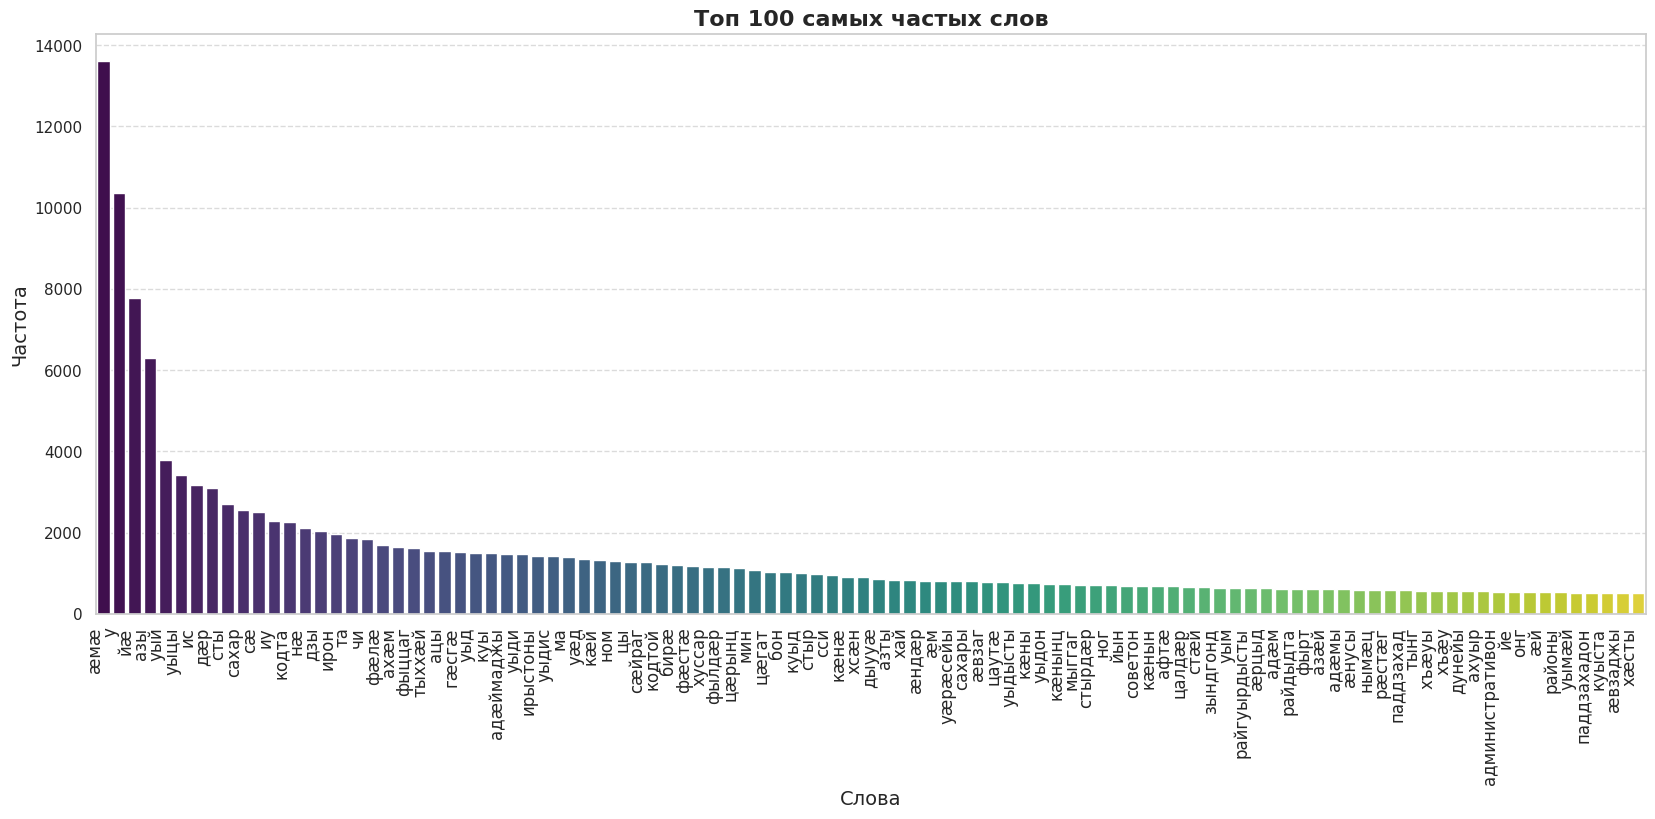

In [31]:
def plot_top_words(word_counts):
    top_words = word_counts
    words, counts = zip(*top_words)

    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 10))

    bar_plot = sns.barplot(x=list(words), y=list(counts), palette="viridis")
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha="right", fontsize=12)
    bar_plot.set_xlabel('Слова', fontsize=14)
    bar_plot.set_ylabel('Частота', fontsize=14)
    bar_plot.set_title(f'Топ {top_n} самых частых слов', fontsize=16, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.subplots_adjust(bottom=0.3)

    plt.show()

top_n=100
word_counts = sorted_words[:top_n]

plot_top_words(word_counts)


In [32]:
import os
import re
import random

def count_lines_words_sentences(file_paths):
    total_lines = 0
    total_words = 0
    total_sentences = 0
    all_sentences = []

    for file_path in file_paths:
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                total_lines += len(lines)
                for line in lines:
                    cleaned_line = re.sub(r'[^\w\s]', '', line)
                    words = cleaned_line.split()
                    total_words += len(words)
                    total_sentences += line.count('.') + line.count('!') + line.count('?')
                    all_sentences.append(cleaned_line)

    print(f"Общее количество предложений (одна строка - одно предложение): {total_lines}")
    print(f"Общее количество слов: {total_words}")

    if all_sentences:
        random_sentence = random.choice(all_sentences)
        print(f"Случайное предложение: {random_sentence}")

file_paths = ['/content/oss_wikipedia_2010_10K-sentences.txt', '/content/oss_wikipedia_2014_10K-sentences.txt', '/content/oss_wikipedia_2016_10K-sentences.txt', '/content/oss_wikipedia_2021_10K-sentences.txt']
count_lines_words_sentences(file_paths)


Общее количество предложений (одна строка - одно предложение): 40000
Общее количество слов: 514274
Случайное предложение: 6506	Сахары бæстыхъæд у æхсæн континенталон



In [35]:
def save_word_counts(sorted_words, output_file):
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write('word_counts = {\n')
        for word, count in sorted_words:
            file.write(f'    "{word}": {count},\n')
        file.write('}\n')

output_file = 'Frequency_dictionary.py'
save_word_counts(sorted_words, output_file)

In [36]:
print_first_lines('/content/Frequency_dictionary.py')

word_counts = {
"æмæ": 13596,
"у": 10361,
"йæ": 7765,
"азы": 6308,
